#### Autores:
**Saby Espinel Galvan** & <br>
**Diego A. Salazar Barreto**

# Exercise 04

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
import zipfile
with zipfile.ZipFile('../datasets/fraud_detection.csv.zip', 'r') as z:
    f = z.open('15_fraud_detection.csv')
    data = pd.io.parsers.read_table(f, index_col=0, sep=',')

In [3]:
data.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [9]:
## Tamaño, # de 1s, % de 1s
data.shape, data.Label.sum(), data.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [10]:
X = data.drop(['Label'], axis=1)
y = data['Label']

# Exercice 04.1

Estimate a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [12]:
#Conteo de NaN
X.isnull().sum() #No hay NaN

accountAge                                      0
digitalItemCount                                0
sumPurchaseCount1Day                            0
sumPurchaseAmount1Day                           0
sumPurchaseAmount30Day                          0
paymentBillingPostalCode - LogOddsForClass_0    0
accountPostalCode - LogOddsForClass_0           0
paymentBillingState - LogOddsForClass_0         0
accountState - LogOddsForClass_0                0
paymentInstrumentAgeInAccount                   0
ipState - LogOddsForClass_0                     0
transactionAmount                               0
transactionAmountUSD                            0
ipPostalCode - LogOddsForClass_0                0
localHour - LogOddsForClass_0                   0
dtype: int64

In [13]:
## Se genera el train y validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
print("x_train.shape: " + str(X_train.shape))
print("y_train.shape: " + str(y_train.shape))

x_train.shape: (104040, 15)
y_train.shape: (104040,)


In [14]:
## Cuantos 0 y 1 en el set "y_train"
print("Numero de clases 1: " + str(y_train[y_train == 1].count()))
print("Numero de clases 0: " + str(y_train[y_train == 0].count()))

Numero de clases 1: 585
Numero de clases 0: 103455


In [15]:
logreg = LogisticRegression()
results = cross_val_score(logreg, X_train, y_train, cv=3, scoring='f1')
pd.Series(results).describe()

C:\Users\da.salazarb\AppData\Local\Continuum\anaconda3\envs\PythonR\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\da.salazarb\AppData\Local\Continuum\anaconda3\envs\PythonR\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


count    3.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
dtype: float64

In [16]:
results = cross_val_score(logreg, X_train, y_train, cv=3, scoring='accuracy')
pd.Series(results).describe()

count    3.000000
mean     0.994368
std      0.000017
min      0.994348
25%      0.994363
50%      0.994377
75%      0.994377
max      0.994377
dtype: float64

**Conclusion**: Un excelente accuracy pero un pesimo F1-score (0.0), debido al desbalanceo de clases.

# Exercice 04.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [ ]:
#Alejandro dijo q este no?

# Exercice 04.3

Now using random-over-sampling

In [17]:
n_samples_0 = (y_train == 0).sum()
print("cero: " + str(n_samples_0))

n_samples_1 = (y_train == 1).sum()
print("uno: " + str(n_samples_1))

cero: 103455
uno: 585


In [18]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X.iloc[filter_], y.iloc[filter_]

In [19]:
target_percentage=0.5
seed=2
n_samples = y_train.shape[0]
n_samples_0 = (y_train == 0).sum()
n_samples_1 = (y_train == 1).sum()
n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)
np.random.seed(seed)
filter_ = np.random.choice(X_train[y_train == 1].shape[0], int(n_samples_1_new))
filter_ = np.nonzero(y_train == 1)[0][filter_]
filter_ = np.concatenate((filter_, np.nonzero(y_train == 0)[0]), axis=0)

In [20]:
y_train.iloc[filter_[0:3]]

35921     1
36103     1
131703    1
Name: Label, dtype: int64

In [22]:
X_u, y_u = OverSampling(X_train, y_train, target_percentage=0.1, seed=2)

In [23]:
logreg = LogisticRegression()
results = cross_val_score(logreg, X_u, y_u, cv=3, scoring='f1')
pd.Series(results).describe()

count    3.000000
mean     0.001891
std      0.003274
min      0.000000
25%      0.000000
50%      0.000000
75%      0.002836
max      0.005672
dtype: float64

In [24]:
logreg = LogisticRegression()
results = cross_val_score(logreg, X_u, y_u, cv=3, scoring='accuracy')
pd.Series(results).describe()

count    3.000000
mean     0.899730
std      0.000343
min      0.899337
25%      0.899612
50%      0.899888
75%      0.899927
max      0.899966
dtype: float64

**Conclusion**: Un excelente accuracy pero un pesimo F1-score. <br> 
    Sin embargo, ya es posible generar un valor de F1 (0.0018).

# Exercice 04.4*
Evaluate the results using SMOTE

Which parameters did you choose?

In [28]:
n_samples_0 = (y_train == 0).sum()
n_samples_1 = (y_train == 1).sum()
print("1: " + str(n_samples_1))
print("0: " + str(n_samples_0))

1: 585
0: 103455


In [29]:
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X_train.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X.loc[y==1].iloc[sel] - step * (X.loc[y==1].iloc[sel] - X.loc[y==1].iloc[nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

In [30]:
X_train.loc[y_train == 1].iloc[34]

accountAge                                        1.000000
digitalItemCount                                  1.000000
sumPurchaseCount1Day                              1.000000
sumPurchaseAmount1Day                           156.420000
sumPurchaseAmount30Day                          156.420000
paymentBillingPostalCode - LogOddsForClass_0      5.064533
accountPostalCode - LogOddsForClass_0             5.096396
paymentBillingState - LogOddsForClass_0           3.464336
accountState - LogOddsForClass_0                  3.595170
paymentInstrumentAgeInAccount                     0.001389
ipState - LogOddsForClass_0                       3.766584
transactionAmount                               157.070000
transactionAmountUSD                            156.421301
ipPostalCode - LogOddsForClass_0                  3.220356
localHour - LogOddsForClass_0                     3.954522
Name: 83828, dtype: float64

In [31]:
X_o, y_o = SMOTE(X_train, y_train, target_percentage=0.25, k=5, seed=3)

In [32]:
print(X_train.shape)
print(X_o.shape)

(104040, 15)
(137940, 15)


In [33]:
logreg = LogisticRegression()
results = cross_val_score(logreg, X_o, y_o, cv=3, scoring='f1')
pd.Series(results).describe()

count    3.000000
mean     0.215337
std      0.186693
min      0.054612
25%      0.112947
50%      0.171281
75%      0.295699
max      0.420117
dtype: float64

In [54]:
logreg = LogisticRegression()
results = cross_val_score(logreg, X_o, y_o, cv=3, scoring='accuracy')
pd.Series(results).describe()

count    3.000000
mean     0.765036
std      0.024452
min      0.746999
25%      0.751120
50%      0.755241
75%      0.774054
max      0.792866
dtype: float64

**Conclusion**: Un excelente accuracy. F1-score sube de valor (0.215), por lo que *SMOTE* mejoro la precision y la excatitud.

# Exercice 04.5

Estimate a Logistic Regression, GaussianNB, K-nearest neighbors and a Decision Tree **Classifiers**

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

Combine the classifiers and comment

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [37]:
models = {'lr': LogisticRegression(),
          'dt': DecisionTreeClassifier(),
          'nb': GaussianNB(),
          'nn': KNeighborsClassifier()}

In [55]:
for model in models.keys():
    models[model].fit(X_o, y_o)

In [56]:
# predict test for each model
y_pred = pd.DataFrame(index=y_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [68]:
# Evaluate each model
print("Accuracy: ")
for model in models.keys():
    print(model,metrics.accuracy_score(y_test, y_pred[model]))

Accuracy: 
lr 0.978922176408
dt 0.985409878608
nb 0.263919725498
nn 0.962861509184


In [69]:
# Evaluate each model
print("F1_Score: ")
for model in models.keys():
    print(model,metrics.f1_score(y_test, y_pred[model]))

F1_Score: 
lr 0.0444444444444
dt 0.102836879433
nb 0.0140583964159
nn 0.0430906389302


In [72]:
print("Accuracy del ensamblaje: " + str(metrics.accuracy_score(y_test, np.where(y_pred.mean(axis=1)>=.45,1,0))))

Accuracy del ensamblaje: 0.958536374384


In [73]:
print("F1_Score del ensamblaje: " + str(metrics.f1_score(y_test, np.where(y_pred.mean(axis=1)>=0.45,1,0))))

F1_Score del ensamblaje: 0.0576671035387


# Exercice 04.6

Using the under-sampled dataset

Evaluate a RandomForestClassifier and compare the results

change n_estimators=100, what happened

In [68]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators=100)
rfreg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [73]:
# list of values to try for max_features
feature_range = range(1, X_train.shape[1])

# list to store the average RMSE for each value of max_features
RMSE_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=100, max_features=feature, random_state=1, n_jobs=-1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=3, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0,0.5,'RMSE (lower is better)')

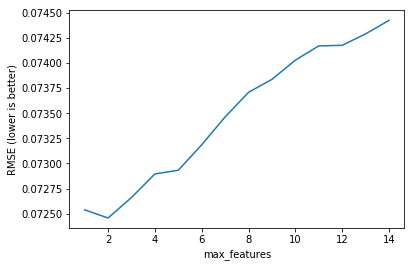

In [76]:
# plot max_features (x-axis) versus RMSE (y-axis)
plt.plot(feature_range, RMSE_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE (lower is better)')

**Conclusion**: Con dos variables se obtiene el mejor resultado para el *RMSE*.